In [7]:
import pandas as pd

try:
    df = pd.read_csv('amz_uk_processed_data.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'amz_uk_processed_data.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,AD_ID,asin,title,imgUrl,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/71C3lbbeLs...,https://www.amazon.co.uk/dp/B09B96TG33,4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",https://m.media-amazon.com/images/I/61c5rSxwP0...,https://www.amazon.co.uk/dp/B01HTH3C8S,4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/61j3SEUjMJ...,https://www.amazon.co.uk/dp/B09B8YWXDF,4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",https://m.media-amazon.com/images/I/71yf6yTNWS...,https://www.amazon.co.uk/dp/B09B8T5VGV,4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,https://m.media-amazon.com/images/I/613dEoF9-r...,https://www.amazon.co.uk/dp/B09WX6QD65,4.6,1881,17.99,False,0,Hi-Fi Speakers


## Data exploration



In [8]:
# Examine the data's shape
print("Shape of the DataFrame:", df.shape)

# Check data types
print("\nData types of each column:\n", df.dtypes)

# Identify missing values
print("\nNumber of missing values per column:\n", df.isnull().sum())

# Descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:\n", df.describe())

Shape of the DataFrame: (1048575, 11)

Data types of each column:
 AD_ID                  int64
asin                  object
title                 object
imgUrl                object
productURL            object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
categoryName          object
dtype: object

Number of missing values per column:
 AD_ID                0
asin                 0
title                0
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
categoryName         0
dtype: int64

Descriptive statistics for numerical columns:
               AD_ID         stars       reviews         price  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   5.242880e+05  2.028797e+00  3.312670e+02  8.074059e+01   
std    3.026977e+05  2.187994e+00  3.372846e+03  2.7

In [9]:
# Initial data preview
print("\nFirst 10 rows of the DataFrame:\n")
display(df.head(10))


First 10 rows of the DataFrame:



,AD_ID,asin,title,imgUrl,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/71C3lbbeLs...,https://www.amazon.co.uk/dp/B09B96TG33,4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",https://m.media-amazon.com/images/I/61c5rSxwP0...,https://www.amazon.co.uk/dp/B01HTH3C8S,4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/61j3SEUjMJ...,https://www.amazon.co.uk/dp/B09B8YWXDF,4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",https://m.media-amazon.com/images/I/71yf6yTNWS...,https://www.amazon.co.uk/dp/B09B8T5VGV,4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,https://m.media-amazon.com/images/I/613dEoF9-r...,https://www.amazon.co.uk/dp/B09WX6QD65,4.6,1881,17.99,False,0,Hi-Fi Speakers
5,6,B09B97WSLF,"Echo Dot with clock (5th generation, 2022 rele...",https://m.media-amazon.com/images/I/71bnkM5q8C...,https://www.amazon.co.uk/dp/B09B97WSLF,4.7,7205,31.99,False,0,Hi-Fi Speakers
6,7,B09B9615X2,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/71YVBa7zc5...,https://www.amazon.co.uk/dp/B09B9615X2,4.7,15308,21.99,False,0,Hi-Fi Speakers
7,8,B01MTB55WH,Anker Soundcore 2 Portable Bluetooth Speaker w...,https://m.media-amazon.com/images/I/617DcBehCq...,https://www.amazon.co.uk/dp/B01MTB55WH,4.7,103673,39.99,False,0,Hi-Fi Speakers
8,9,B016MO90GW,"Bluetooth Speaker, Anker Soundcore Speaker Upg...",https://m.media-amazon.com/images/I/61y+b4M0RZ...,https://www.amazon.co.uk/dp/B016MO90GW,4.7,29909,29.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,https://m.media-amazon.com/images/I/810dSwE0Mo...,https://www.amazon.co.uk/dp/B09ZQF5GZW,4.5,16014,29.99,False,0,Hi-Fi Speakers


In [10]:
# Unique value counts for categorical columns
print("\nNumber of unique values in 'categoryName':", df['categoryName'].nunique())
print("\nValue counts for 'categoryName':\n", df['categoryName'].value_counts())
print("\nNumber of unique values in 'isBestSeller':", df['isBestSeller'].nunique())
print("\nValue counts for 'isBestSeller':\n", df['isBestSeller'].value_counts())


Number of unique values in 'categoryName': 149

Value counts for 'categoryName':
 categoryName
Sports & Outdoors               413665
Skin Care                        18755
Fragrances                       18563
Make-up                          18453
Manicure & Pedicure Products     17212
                                 ...  
Alexa Built-In Devices              69
eBook Readers & Accessories         24
Light Bulbs                         23
Smart Speakers                      19
Lighting                            14
Name: count, Length: 149, dtype: int64

Number of unique values in 'isBestSeller': 2

Value counts for 'isBestSeller':
 isBestSeller
False    1046105
True        2470
Name: count, dtype: int64


In [11]:
# Summarize initial findings
print("\nSummary of initial data exploration:")
print("The dataset has", df.shape[0], "rows and", df.shape[1], "columns.")
print("Key observations about data types, missing values, and descriptive statistics are printed above.")
print("The 'categoryName' column has", df['categoryName'].nunique(), "unique categories.")
print("The most frequent category is", df['categoryName'].value_counts().index[0], "with", df['categoryName'].value_counts().iloc[0], "occurrences.")
print("The 'isBestSeller' column has", df['isBestSeller'].nunique(), "unique values.")


Summary of initial data exploration:
The dataset has 1048575 rows and 11 columns.
Key observations about data types, missing values, and descriptive statistics are printed above.
The 'categoryName' column has 149 unique categories.
The most frequent category is Sports & Outdoors with 413665 occurrences.
The 'isBestSeller' column has 2 unique values.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt  # Import the necessary module
import seaborn as sns  # Import seaborn as well


In [17]:
# Define price bins
bins = [0, 10, 20, 30, 40, 50, float('inf')]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50+']

# Create a new column with price ranges
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels)

price_range_satisfaction = df.groupby('price_range')['stars'].mean()

<ipython-input-17-a771eabe8053>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_satisfaction = df.groupby('price_range')['stars'].mean()


## Data analysis



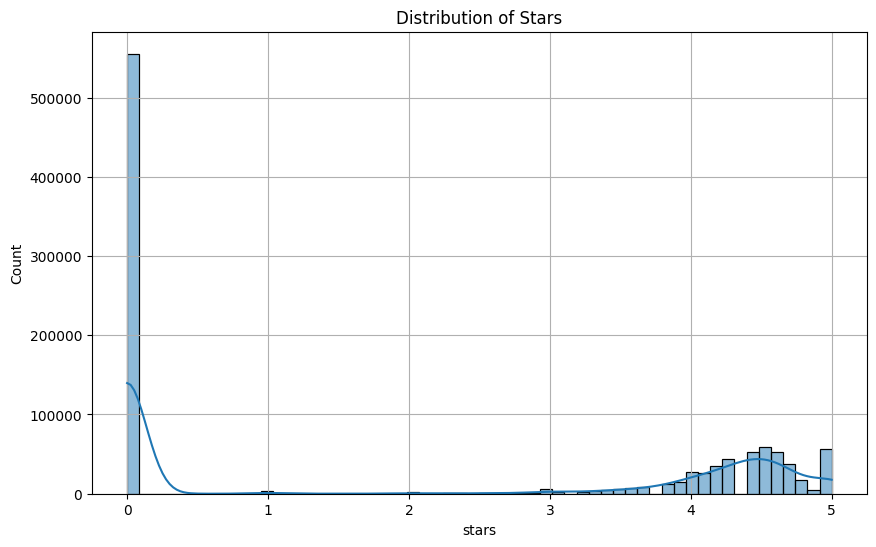

In [20]:
# Distribution of key numerical variables

for col in ['stars']:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col.capitalize()}')
    if col in ['price']:
        plt.yscale('log')
    plt.grid(True)
    plt.show()

Correlation between stars and reviews: 0.1098204523052197


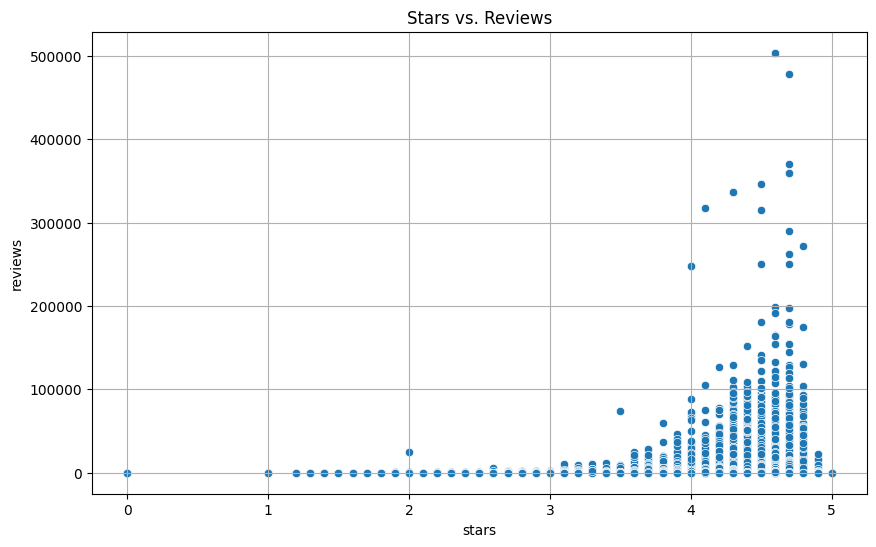

In [21]:
# Relationship between 'stars' and 'reviews'

correlation_stars_reviews = df['stars'].corr(df['reviews'])
print(f"Correlation between stars and reviews: {correlation_stars_reviews}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='stars', y='reviews', data=df)
plt.title('Stars vs. Reviews')
plt.grid(True)
plt.show()


Correlation between price and stars: -0.11546030542877161


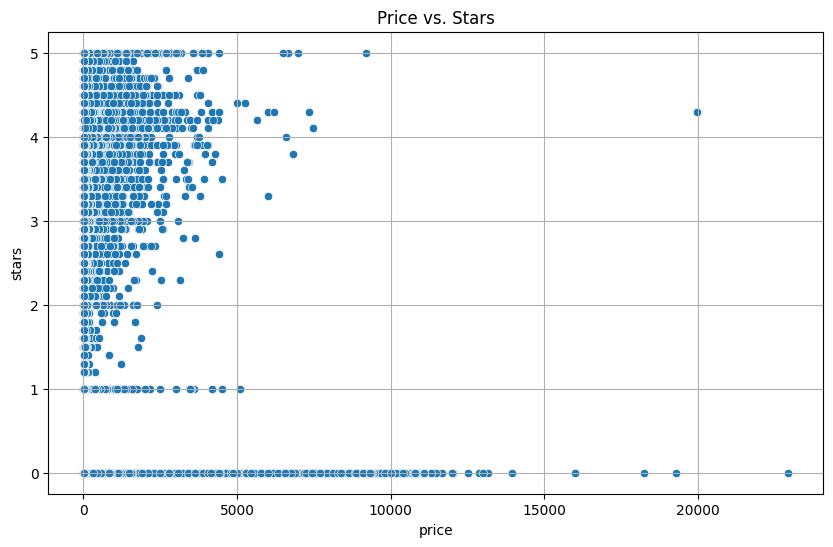

Correlation between price and reviews: -0.016921013894773056


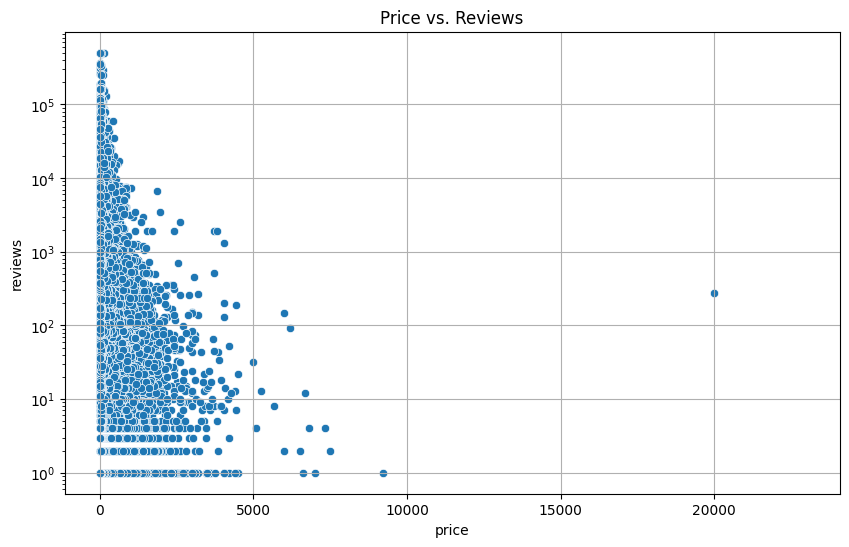

Correlation between price and boughtInLastMonth: -0.022420883350824525


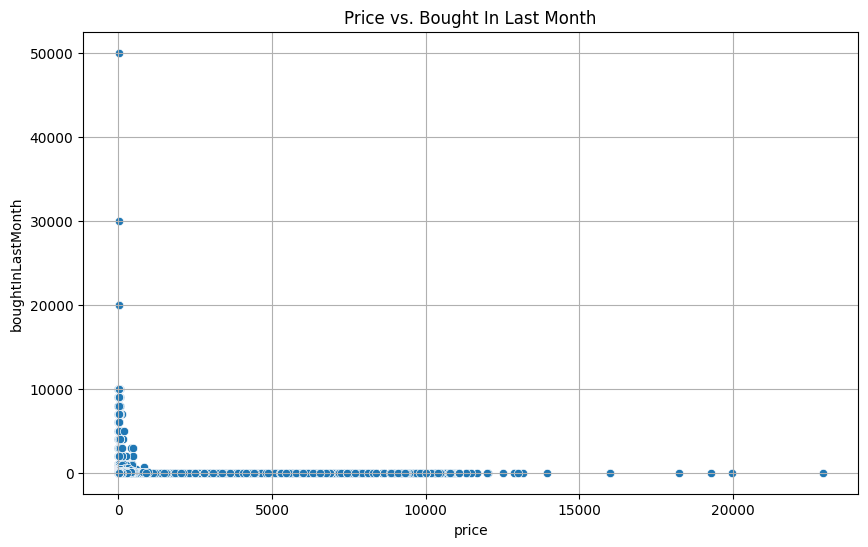

In [22]:
# Relationship between 'price' and other variables

# Price vs Stars
correlation_price_stars = df['price'].corr(df['stars'])
print(f"Correlation between price and stars: {correlation_price_stars}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='stars', data=df)
plt.title('Price vs. Stars')
plt.grid(True)
plt.show()

# Price vs Reviews
correlation_price_reviews = df['price'].corr(df['reviews'])
print(f"Correlation between price and reviews: {correlation_price_reviews}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='reviews', data=df)
plt.title('Price vs. Reviews')
plt.yscale('log')
plt.grid(True)
plt.show()

# Price vs Bought in Last Month
correlation_price_bought = df['price'].corr(df['boughtInLastMonth'])
print(f"Correlation between price and boughtInLastMonth: {correlation_price_bought}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='boughtInLastMonth', data=df)
plt.title('Price vs. Bought In Last Month')
plt.grid(True)
plt.show()

                 stars             reviews              price         \
                  mean median         mean  median       mean median   
isBestSeller                                                           
False         2.023179    0.0   315.777319     0.0  80.875287  19.04   
True          4.408381    4.5  6891.535223  1630.5  23.693045  13.11   

             boughtInLastMonth         
                          mean median  
isBestSeller                           
False                14.904383    0.0  
True                786.497976  200.0  


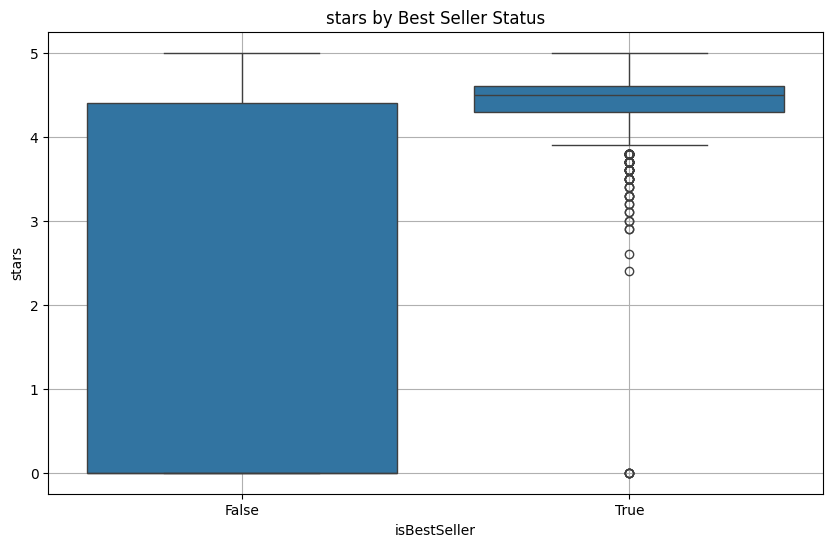

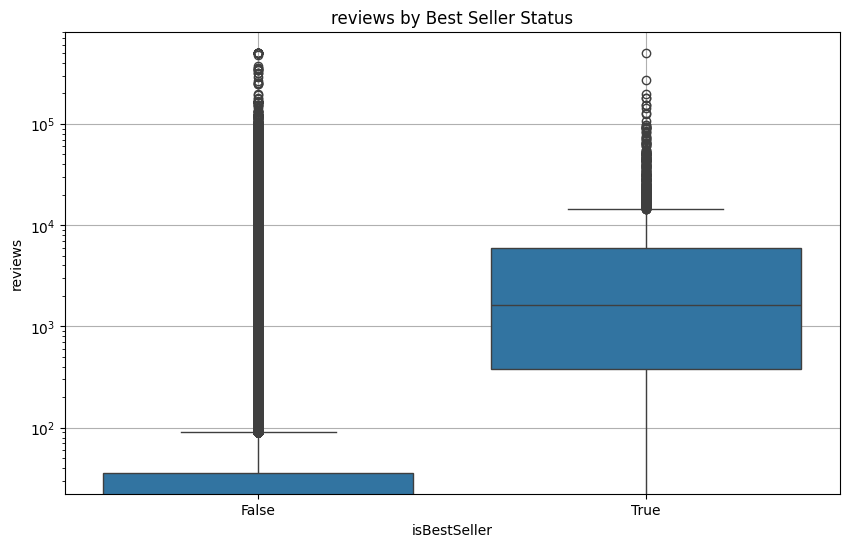

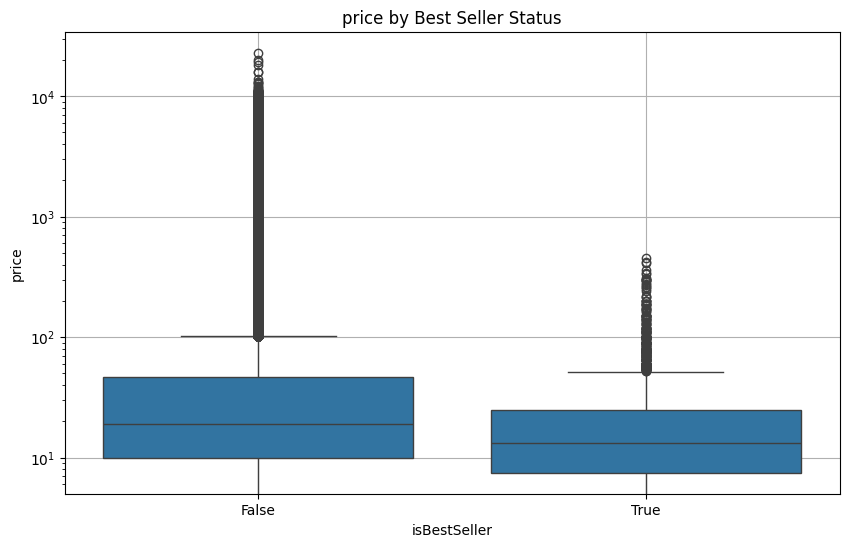

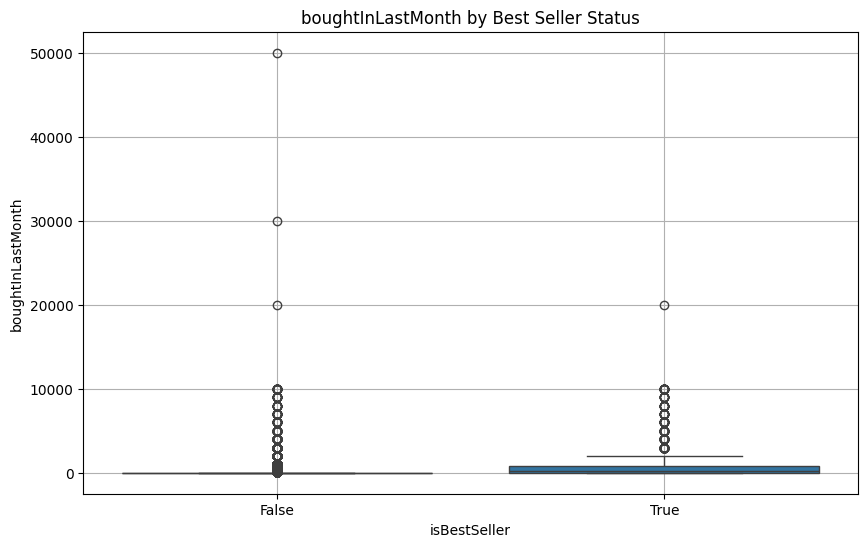

In [23]:
# Relationship with 'isBestSeller'

# Grouped statistics
print(df.groupby('isBestSeller').agg({
    'stars': ['mean', 'median'],
    'reviews': ['mean', 'median'],
    'price': ['mean', 'median'],
    'boughtInLastMonth': ['mean', 'median']
}))

# Boxplots

for col in ['stars', 'reviews', 'price', 'boughtInLastMonth']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='isBestSeller', y=col, data=df)
    plt.title(f'{col} by Best Seller Status')
    if col in ['reviews', 'price']:
        plt.yscale('log')
    plt.grid(True)
    plt.show()

<ipython-input-24-5c638573f60e>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_satisfaction = df.groupby('price_range')['stars'].mean()


The price range with the highest customer satisfaction is: 0-10


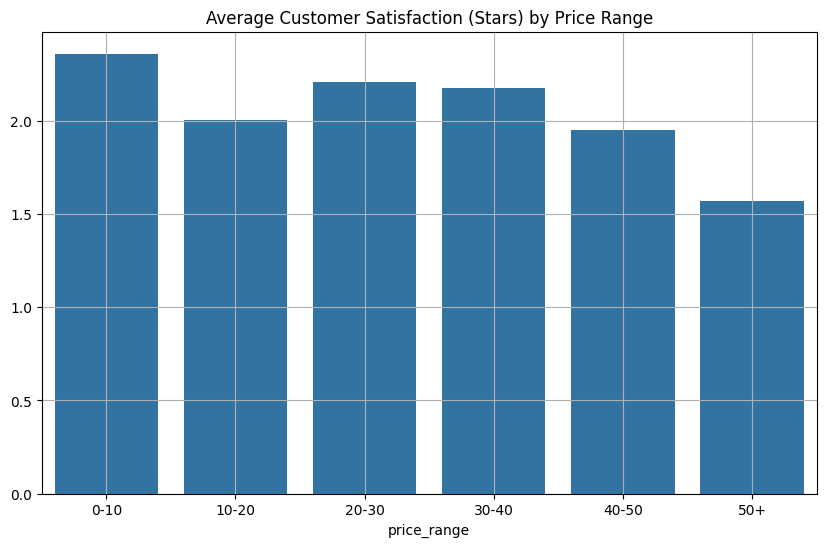

In [24]:
# Price Range vs. Stars

price_range_satisfaction = df.groupby('price_range')['stars'].mean()
highest_satisfaction_range = price_range_satisfaction.idxmax()
print(f"The price range with the highest customer satisfaction is: {highest_satisfaction_range}")

plt.figure(figsize=(10, 6))
sns.barplot(x=price_range_satisfaction.index, y=price_range_satisfaction.values)
plt.title('Average Customer Satisfaction (Stars) by Price Range')
plt.grid(True)
plt.show()

Correlation between stars and reviews: 0.1098204523052197


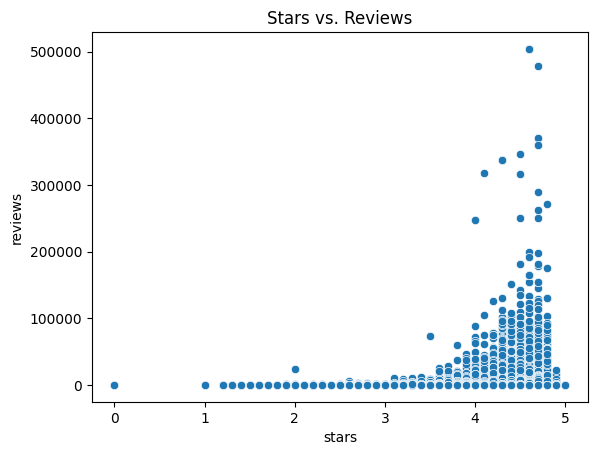

In [25]:
# Calculate the correlation between star ratings and the number of reviews
correlation_stars_reviews = df['stars'].corr(df['reviews'])
print(f"Correlation between stars and reviews: {correlation_stars_reviews}")

# Visualize the relationship using a scatter plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='stars', y='reviews', data=df)
plt.title('Stars vs. Reviews')
plt.show()

In [26]:
# Best-Selling vs Non-Best-Selling: Average Price

avg_price_bestseller = df[df['isBestSeller'] == 1]['price'].mean()
avg_price_non_bestseller = df[df['isBestSeller'] == 0]['price'].mean()

print(f"Average price of best-selling products: {avg_price_bestseller}")
print(f"Average price of non-best-selling products: {avg_price_non_bestseller}")

Average price of best-selling products: 23.693044534412955
Average price of non-best-selling products: 80.87528749982074


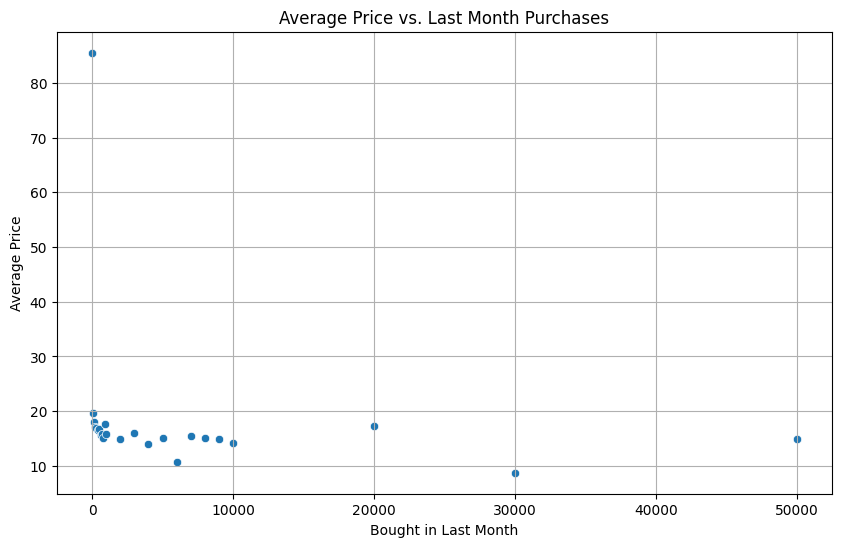

In [27]:
# Bought Last Month vs. Average Price

avg_price_by_month = df.groupby('boughtInLastMonth')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='boughtInLastMonth', y='price', data=avg_price_by_month)
plt.title('Average Price vs. Last Month Purchases')
plt.xlabel('Bought in Last Month')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

In [28]:
# Get the value counts for each price range
price_range_counts = df['price_range'].value_counts()

# Display the counts
print(price_range_counts)

# Identify the most popular price range
most_popular_range = price_range_counts.idxmax()
print(f"The most popular price range is: {most_popular_range}")

price_range
10-20    286005
0-10     266317
50+      243012
20-30    132215
30-40     72706
40-50     48309
Name: count, dtype: int64
The most popular price range is: 10-20


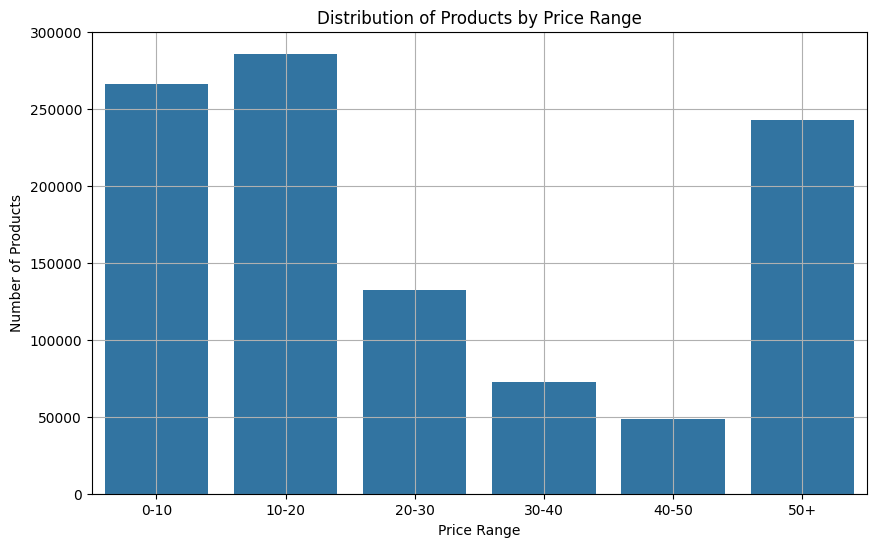

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the 'price_range' column

# Get the value counts for each price range
price_range_counts = df['price_range'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.barplot(x=price_range_counts.index, y=price_range_counts.values)
plt.title('Distribution of Products by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Products')
plt.grid(True)  # Add gridlines for better readability
plt.show()

In [30]:
# Calculate average price for best-selling and non-best-selling products
avg_price_bestseller = df[df['isBestSeller'] == 1]['price'].mean()
avg_price_non_bestseller = df[df['isBestSeller'] == 0]['price'].mean()

print(f"Average price of best-selling products: {avg_price_bestseller}")
print(f"Average price of non-best-selling products: {avg_price_non_bestseller}")

# Compare the average prices to identify pricing trends

Average price of best-selling products: 23.693044534412955
Average price of non-best-selling products: 80.87528749982074


<ipython-input-31-0b48423e6700>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_satisfaction = df.groupby('price_range')['stars'].mean()


Text(0.5, 1.0, 'Average Customer Satisfaction (Stars) by Price Range')

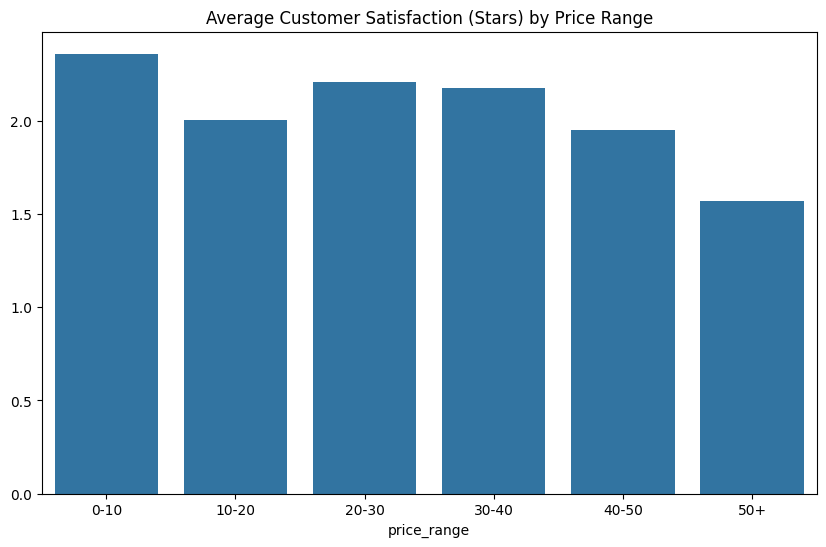

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'price_range' and 'stars' columns

# Group by 'price_range' and calculate average stars
price_range_satisfaction = df.groupby('price_range')['stars'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.barplot(x=price_range_satisfaction.index, y=price_range_satisfaction.values)
plt.title('Average Customer Satisfaction (Stars) by Price Range')


In [32]:
import pandas as pd

# Assuming 'df' is your DataFrame with 'price_range', 'categoryName', and 'boughtInLastMonth' columns

top_selling_categories = df.groupby(['price_range', 'categoryName'])['boughtInLastMonth'].sum().reset_index()

for price_range in top_selling_categories['price_range'].unique():
    top_10_in_range = top_selling_categories[top_selling_categories['price_range'] == price_range].sort_values(by='boughtInLastMonth', ascending=False).head(10)
    print(f"\nTop 10 Most Selling Categories in Price Range: {price_range}")
    print(top_10_in_range[['categoryName', 'boughtInLastMonth']])


Top 10 Most Selling Categories in Price Range: 0-10
                         categoryName  boughtInLastMonth
109                      Pet Supplies            1383650
125                         Skin Care            1291600
81                            Make-up             860250
132            Storage & Organisation             755500
108  Pens, Pencils & Writing Supplies             525350
7                         Bath & Body             488000
54                           Hardware             451150
82       Manicure & Pedicure Products             436000
20               Cables & Accessories             416500
68         Kids' Art & Craft Supplies             275150

Top 10 Most Selling Categories in Price Range: 10-20
                          categoryName  boughtInLastMonth
258                       Pet Supplies            1199100
281             Storage & Organisation             700400
274                          Skin Care             641800
161               Beer, Wine & Spi

<ipython-input-32-01d6b2812e17>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_selling_categories = df.groupby(['price_range', 'categoryName'])['boughtInLastMonth'].sum().reset_index()


In [33]:
# Group data and calculate average star rating
price_range_recommendations = df.groupby(['price_range', 'isBestSeller'])['stars'].mean().reset_index()

# Filter for recommendations (e.g., average stars >= 4.0)
recommended_products = price_range_recommendations[price_range_recommendations['stars'] >= 4.0]

# Identify price ranges for isBestSeller True and False
recommended_bestsellers = recommended_products[recommended_products['isBestSeller'] == 1]['price_range'].unique()
recommended_non_bestsellers = recommended_products[recommended_products['isBestSeller'] == 0]['price_range'].unique()

# Display the results
print("Price ranges recommended for isBestSeller=True:", recommended_bestsellers)
print("Price ranges recommended for isBestSeller=False:", recommended_non_bestsellers)

Price ranges recommended for isBestSeller=True: ['0-10', '10-20', '20-30', '30-40', '40-50', '50+']
Categories (6, object): ['0-10' < '10-20' < '20-30' < '30-40' < '40-50' < '50+']
Price ranges recommended for isBestSeller=False: [], Categories (6, object): ['0-10' < '10-20' < '20-30' < '30-40' < '40-50' < '50+']


<ipython-input-33-de2c221f998c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_recommendations = df.groupby(['price_range', 'isBestSeller'])['stars'].mean().reset_index()


In [34]:
# Filter data for good star ratings (e.g., 4.0 or higher)
filtered_df = df[df['stars'] >= 4.0]

# Group by price range and calculate total reviews
price_range_reviews = filtered_df.groupby('price_range')['reviews'].sum().reset_index()

# Find price range with most reviews
most_reviews_range = price_range_reviews.loc[price_range_reviews['reviews'].idxmax(), 'price_range']

print(f"The price range with the most reviews and a good star rating is: {most_reviews_range}")

The price range with the most reviews and a good star rating is: 0-10


<ipython-input-34-21d9b8394428>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_reviews = filtered_df.groupby('price_range')['reviews'].sum().reset_index()


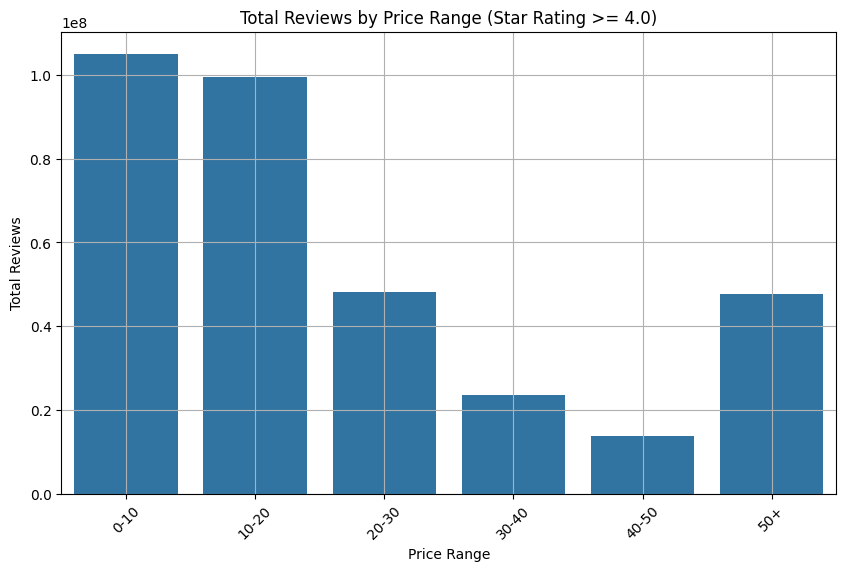

In [35]:
# Assuming 'price_range_reviews' DataFrame from previous code

# Create bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.barplot(x='price_range', y='reviews', data=price_range_reviews)
plt.title('Total Reviews by Price Range (Star Rating >= 4.0)')
plt.xlabel('Price Range')
plt.ylabel('Total Reviews')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Highlight maximum
max_reviews_index = price_range_reviews['reviews'].idxmax()
plt.gca().get_children()[max_reviews_index]

plt.show()

<ipython-input-36-48f03acf0324>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_reviews = filtered_df.groupby('price_range')['reviews'].sum().reset_index()


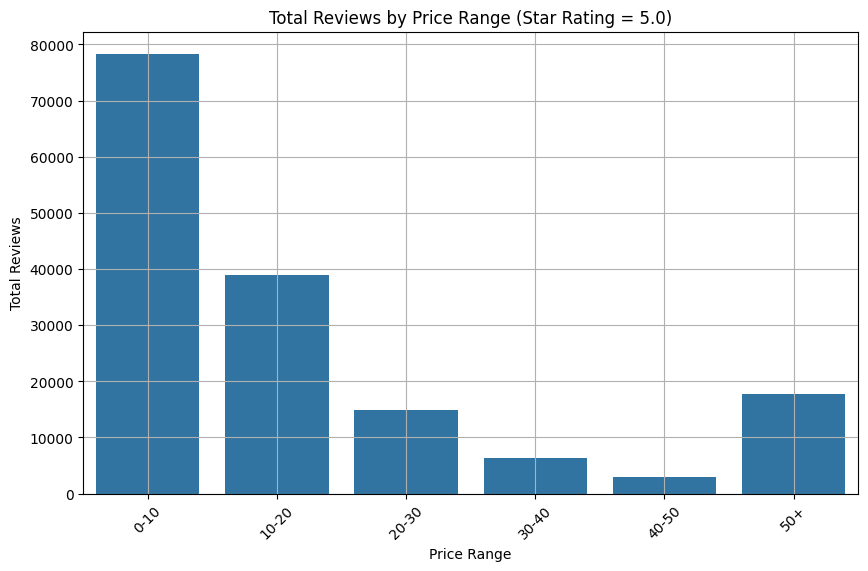

In [36]:
# Filter data for bad star ratings (e.g., below 3.0)
filtered_df = df[df['stars'] < 3.0]  # Adjust threshold as needed

# Group by price range and calculate total reviews
price_range_reviews = filtered_df.groupby('price_range')['reviews'].sum().reset_index()

# Create bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.barplot(x='price_range', y='reviews', data=price_range_reviews)
plt.title('Total Reviews by Price Range (Star Rating = 5.0)')  # Adjust title as needed
plt.xlabel('Price Range')
plt.ylabel('Total Reviews')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Highlight maximum
max_reviews_index = price_range_reviews['reviews'].idxmax()
plt.gca().get_children()[max_reviews_index]

plt.show()